# Visual exploratory data analysis
### Analyzing Police Activity with pandas
#### Career track : Data Analyts with Python
#### DataCamp - 2020
#### Karen Jimenez

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('data/police.csv')

## Calculating the hourly arrest rate

In [2]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

ri['stop_datetime'] = pd.to_datetime(combined)
ri['is_arrested'] = ri['is_arrested'].astype(bool)

ri.set_index('stop_datetime', inplace=True)

In [3]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.09025408486936048
stop_datetime
0     0.121206
1     0.144250
2     0.144120
3     0.148370
4     0.179310
5     0.178899
6     0.043614
7     0.053497
8     0.073591
9     0.070199
10    0.069306
11    0.075217
12    0.087040
13    0.078964
14    0.080171
15    0.080526
16    0.089505
17    0.107914
18    0.089883
19    0.078508
20    0.091482
21    0.153265
22    0.110715
23    0.108225
Name: is_arrested, dtype: float64


## Plotting the hourly arrest rate

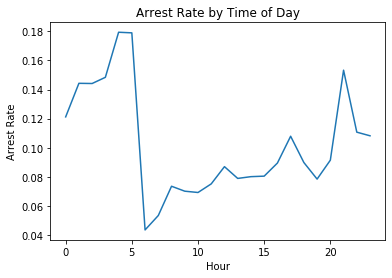

In [4]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

<i> The arrest rate has a significant spike overnight, and then dips in the early morning hours
<hr>

## Plotting drug-relate stops

stop_datetime
2005-12-31    0.006390
2006-12-31    0.006913
2007-12-31    0.007520
2008-12-31    0.006998
2009-12-31    0.009079
2010-12-31    0.009407
2011-12-31    0.009035
2012-12-31    0.009388
2013-12-31    0.012283
2014-12-31    0.013280
2015-12-31    0.011787
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


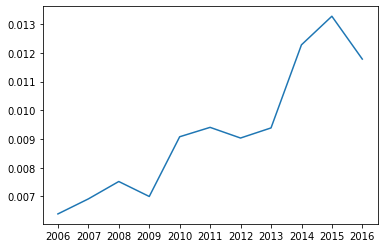

In [5]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
plt.plot(annual_drug_rate)

# Display the plot
plt.show()

<i> The rate of drug-related stops nearly doubled over the course of 10 years.
<hr>

## Comparing drug and search rates

<i> **Hypothesis:** the rate of vehicle searches was also increasing, which would have led to an increase in drug-related stops even if more drivers were not carrying drugs.
<hr>

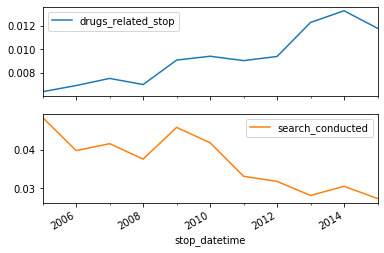

In [6]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

<i> The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.
<hr>

## Next

<i> The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.
<hr>

<i> The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.
<hr>

<i> The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.
<hr>